In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load the dataset
file_path = '/content/winequality-red.csv'  # Replace with the correct file path
wine_df = pd.read_csv(file_path)

# Display the first few rows to confirm data is loaded
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Mean values by quality:
         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.0849

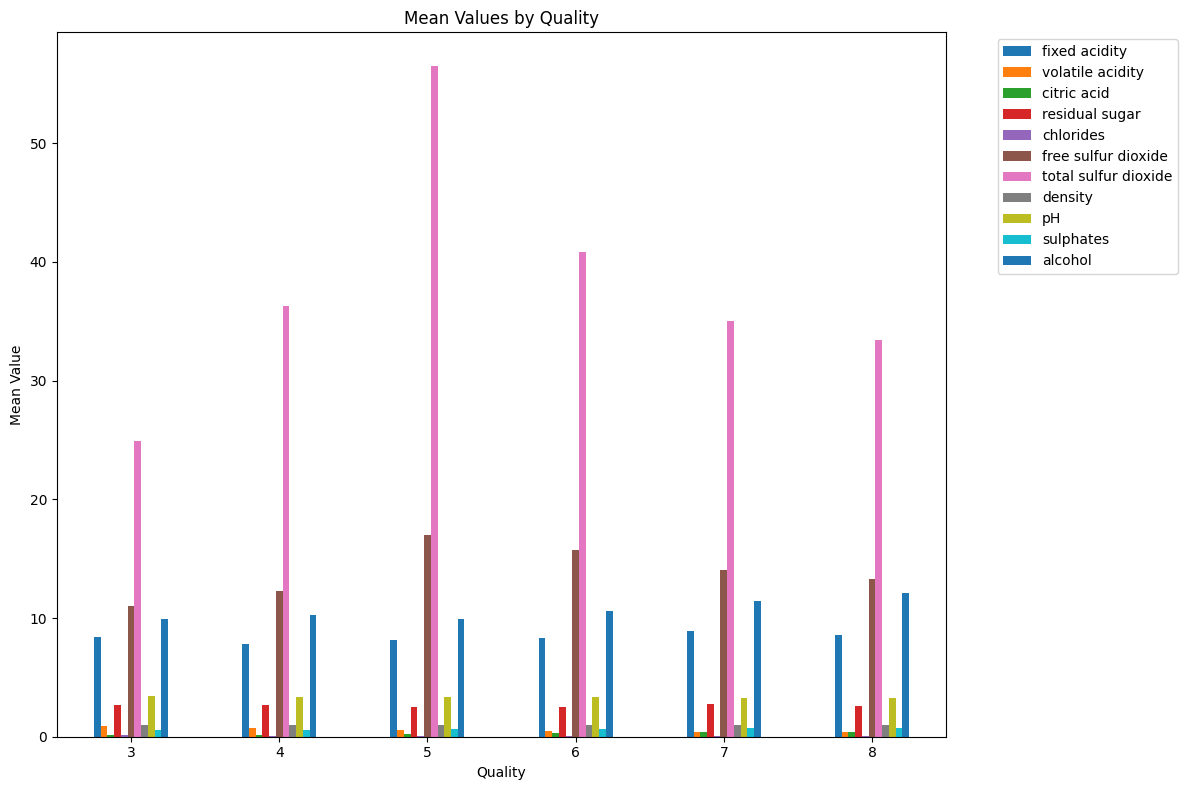

In [4]:
# Calculate the mean values for all columns grouped by quality
correlation_analysis_quality = wine_df.groupby('quality').mean()

# Display the results
print("Mean values by quality:")
print(correlation_analysis_quality)

# Visualize the relationships with bar plots
correlation_analysis_quality.plot(kind='bar', figsize=(12, 8), title="Mean Values by Quality", ylabel="Mean Value")
plt.xlabel("Quality")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [5]:
# Select acid columns as features
X = wine_df.drop(columns=['quality'])

# Define the target variable
y = wine_df['quality']

In [6]:
# Initialize SMOTE
smote = SMOTE(random_state=0)

# Apply SMOTE to balance the dataset
X_res, y_res = smote.fit_resample(X, y)

In [7]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [8]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing set
X_test_scaled = scaler.transform(X_test)

In [9]:
# Initialize the Logistic Regression model
lr = LogisticRegression()

# Train the Logistic Regression model
lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

Logistic Regression Accuracy: 0.59


In [10]:
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Train the Decision Tree Classifier
dt.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.78


In [11]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.86


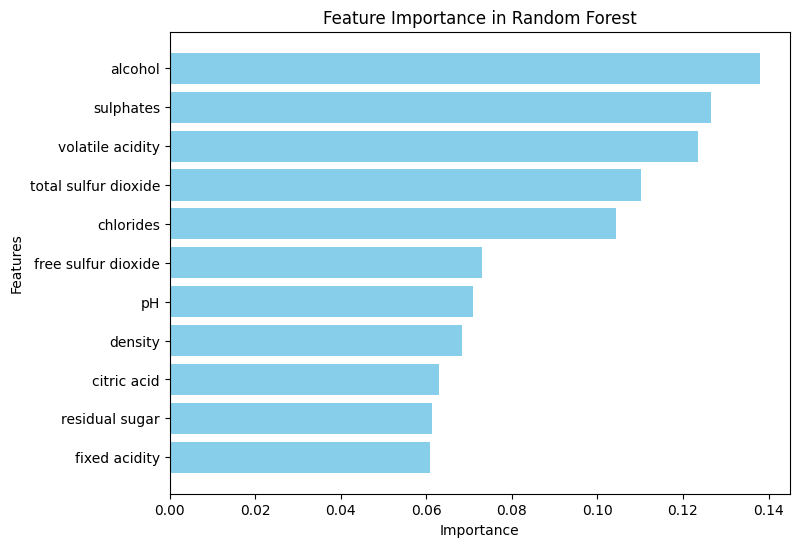

                 Feature  Importance
10               alcohol    0.138037
9              sulphates    0.126515
1       volatile acidity    0.123422
6   total sulfur dioxide    0.110091
4              chlorides    0.104386
5    free sulfur dioxide    0.072915
8                     pH    0.070990
7                density    0.068379
2            citric acid    0.063081
3         residual sugar    0.061310
0          fixed acidity    0.060875


In [12]:
# Get feature importances from the Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Display sorted importance
print(importance_df)

In [13]:
# Filter high-quality predictions
high_quality_indices = [i for i, pred in enumerate(y_pred_rf) if pred == 8]  # Replace 8 with the label for high quality
high_quality_wines = X_test.iloc[high_quality_indices]

# Display the mean values of all features for high-quality predictions
print("Optimal Feature Levels for High-Quality Wine:")
print(high_quality_wines.mean())

Optimal Feature Levels for High-Quality Wine:
fixed acidity            8.583671
volatile acidity         0.416812
citric acid              0.403104
residual sugar           2.511778
chlorides                0.068636
free sulfur dioxide     13.077662
total sulfur dioxide    32.100997
density                  0.995220
pH                       3.268047
sulphates                0.757110
alcohol                 12.118119
dtype: float64


In [14]:
# Generate synthetic combinations for all features
synthetic_data = pd.DataFrame({
    col: np.random.uniform(X[col].min(), X[col].max(), 1000) for col in X.columns
})

# Scale the synthetic data
synthetic_data_scaled = scaler.transform(synthetic_data)

# Predict quality for synthetic data
synthetic_predictions = rf.predict(synthetic_data_scaled)

# Filter high-quality predictions
high_quality_synthetic = synthetic_data[synthetic_predictions == 8]  # Replace 8 with the high-quality label

# Find the mean feature levels for "perfect" high-quality wine
print("Perfect Feature Levels for High-Quality Wine:")
print(high_quality_synthetic.mean())

Perfect Feature Levels for High-Quality Wine:
fixed acidity             7.782822
volatile acidity          1.014279
citric acid               0.450067
residual sugar            7.615262
chlorides                 0.108833
free sulfur dioxide      26.438862
total sulfur dioxide    103.330624
density                   0.995036
pH                        3.303062
sulphates                 0.992370
alcohol                  13.003421
dtype: float64
